## Data Visualization with seaborn pairplot and heatmap - Multivariate plots
## Seaborn advantages over Matplotlib 

As seaborn is built over matplotlib, most plt commands will work for seaborn.

In [2]:
# Import Matplotlib
import matplotlib.pyplot as plt 


# Import dependencies
import numpy as np
import pandas as pd

##### Displaying Plots in Matplotlib

 plt.show() 

• %matplotlib inline – It will output static images of the plot embedded in the notebook.


### Load Dataset & check shape

In [4]:
#Let's load a dataset and have a look at first 5 rows.
data_BM = pd.read_csv('bigmart_data.csv')
print(data_BM.shape)
data_BM.head()


(402, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Check for null values

In [6]:
# Check if null value

data_BM.isnull().sum()

Item_Identifier                0
Item_Weight                   78
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  117
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

### Drop Null values

In [7]:
# drop the null values - 78 + 117 = 195 rows dropped
data_BM = data_BM.dropna()
print(data_BM.shape)    # 402-195=207 rows left

(207, 12)


In [8]:
# view the columns
data_BM.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
data_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


## Line Chart using Matplotlib
Using Matplotlib

In [11]:
# groupby method1
price_by_item = data_BM.groupby('Item_Type').Item_MRP.mean()[:15]
price_by_item

Item_Type
Baking Goods             100.951786
Breads                    86.575933
Breakfast                 55.361400
Canned                   152.472637
Dairy                    187.301656
Frozen Foods             135.840591
Fruits and Vegetables    143.513079
Hard Drinks              101.875300
Health and Hygiene       128.242455
Household                152.434274
Meat                     141.601067
Others                   161.597950
Snack Foods              153.066258
Soft Drinks               99.744892
Starchy Foods            164.464867
Name: Item_MRP, dtype: float64

In [14]:
# groupby method2
price_by_item1 = data_BM.groupby('Item_Type')['Item_MRP'].mean()
print(price_by_item1)
print(type(price_by_item1))

Item_Type
Baking Goods             100.951786
Breads                    86.575933
Breakfast                 55.361400
Canned                   152.472637
Dairy                    187.301656
Frozen Foods             135.840591
Fruits and Vegetables    143.513079
Hard Drinks              101.875300
Health and Hygiene       128.242455
Household                152.434274
Meat                     141.601067
Others                   161.597950
Snack Foods              153.066258
Soft Drinks               99.744892
Starchy Foods            164.464867
Name: Item_MRP, dtype: float64
<class 'pandas.core.series.Series'>


In [16]:
# price_by_item1 is a series
print(price_by_item1.index)
print(price_by_item1.values)

Index(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Snack Foods',
       'Soft Drinks', 'Starchy Foods'],
      dtype='object', name='Item_Type')
[100.95178571  86.57593333  55.3614     152.4726375  187.30165556
 135.8405913  143.51307857 101.8753     128.24245455 152.43427368
 141.60106667 161.59795    153.06625806  99.74489231 164.46486667]


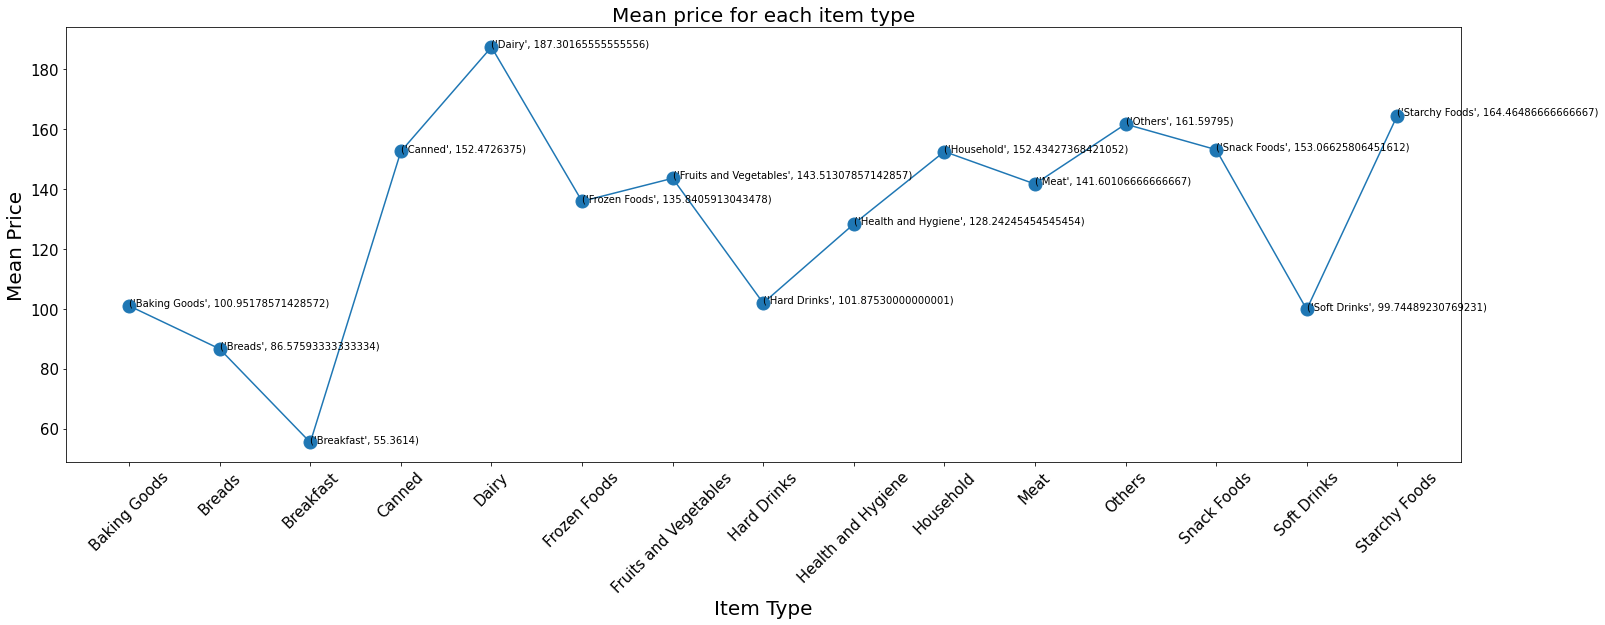

In [45]:
# Plot using Matplotlib

x_item = price_by_item1.index
y_mrp_Mean = price_by_item1.values


# set figure size
plt.figure(figsize=(25,8))

# set title
plt.title('Mean price for each item type',fontdict={'fontsize': 20})

# set axis labels
plt.xlabel('Item Type',fontdict={'fontsize': 20})
plt.ylabel('Mean Price',fontdict={'fontsize': 20})

plt.plot(x_item,y_mrp_Mean,marker='o',markersize=13)

plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)

for idx in range(len(x_item)):  #to get total number of elements in x & access values by their index
    plt.text(x=x_item[idx], y=y_mrp_Mean[idx], s=(x_item[idx],y_mrp_Mean[idx])); # axes.text(x, y, s) 
    
    

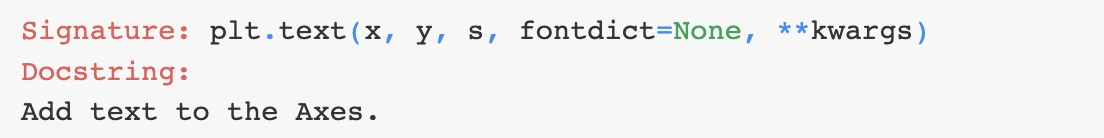

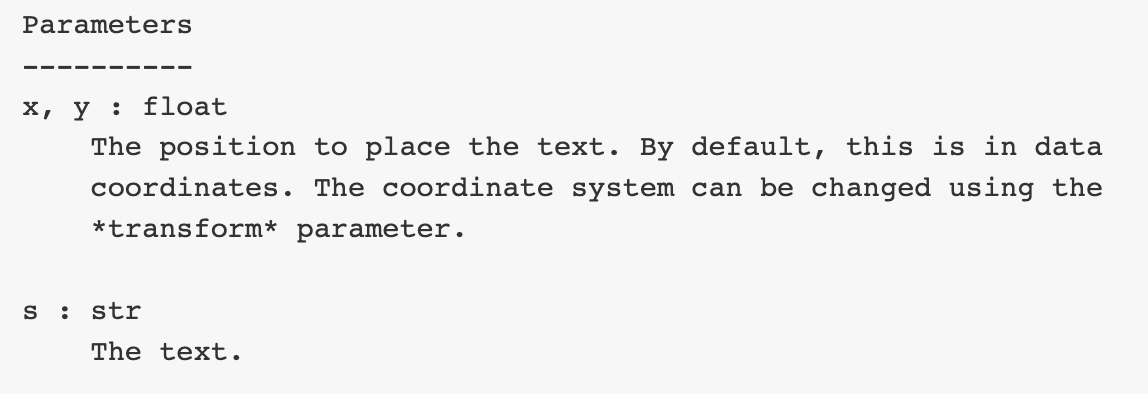

## Bar chart using Matplotlib

- For catagorical variables
- use plt.bar() instead of plt.plot() 

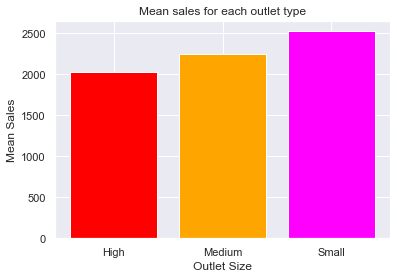

In [73]:
# Avg sales by outlet size
#sales_by_outlet_size = data_BM.groupby('Outlet_Size').Item_Outlet_Sales.mean()
sales_by_outlet_size = data_BM.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

# sort by sales
sales_by_outlet_size.sort_values(inplace=True)

x = sales_by_outlet_size.index
y = sales_by_outlet_size.values

# set axis labels
plt.xlabel('Outlet Size')
plt.ylabel('Mean Sales')

# set title
plt.title('Mean sales for each outlet type')


plt.bar(x, y, color=['red', 'orange', 'magenta']);

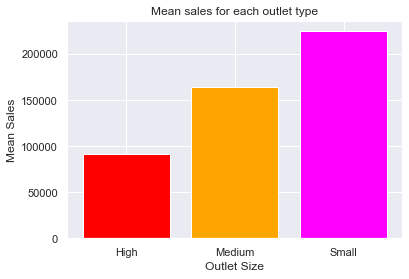

In [74]:
# Sum sales by outlet size
#sales_by_outlet_size = data_BM.groupby('Outlet_Size').Item_Outlet_Sales.mean()
sales_by_outlet_size = data_BM.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()

# sort by sales
sales_by_outlet_size.sort_values(inplace=True)

x = sales_by_outlet_size.index
y = sales_by_outlet_size.values

# set axis labels
plt.xlabel('Outlet Size')
plt.ylabel('Mean Sales')

# set title
plt.title('Mean sales for each outlet type')


plt.bar(x, y, color=['red', 'orange', 'magenta']);

## Introduction to Seaborn

- Based on Matplotlib
- So all matplotlib functions will work here as well like plt.xticks, plt.figure, plt.title etc
- Inorder to do title etc using seaborn u will have to first assign seaborn plot to a variable, then use that variable to assign title etc
- Choices for plot style and color defaults
- Less coding

In [46]:
# importing required libraries
import seaborn as sns

sns.set()
sns.set(style="darkgrid")

## Line plot using seaborn

- Use  lineplot() function  or with relplot() by setting kind="line"
- For continuous variable

### Difference b/w Discrete and Continuous graph

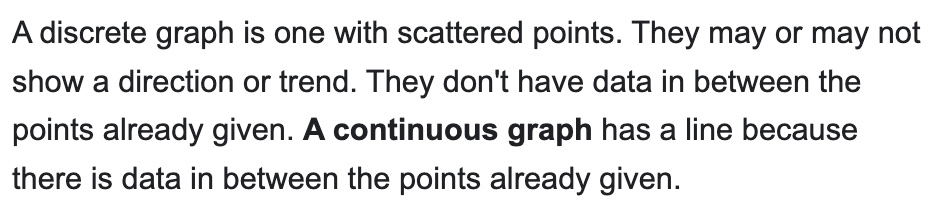

In the first graph there is months Jan, Feb etc so we have discrete points (each month is 1 point) so we go for bar chart although it is possible to draw a line chart also for the same (line chart with discrete data on x-axis) as we know there could be a possibility of trend in this case so ok to plot a line graph.


In the 2nd graph, b/w 2 points i.e. 2015 and 2016 there are many data points (1 point for each month in b/w) hence this is a continuous data & line chart better suited to see the trend.

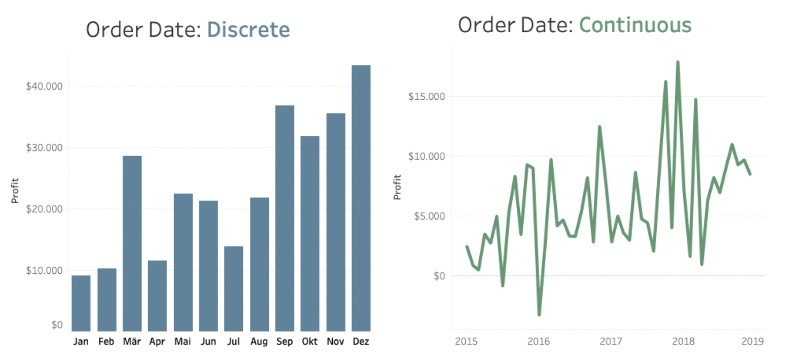

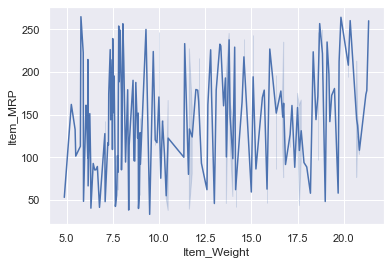

In [54]:
# line plot using relplot
sns.lineplot(x="Item_Weight", y="Item_MRP",data=data_BM);

# in this case both a & y axis i.e. weight & mrp r continuous variables, better to draw a line chart. 

## Bar  plot using seaborn

- Use  using the barplot function

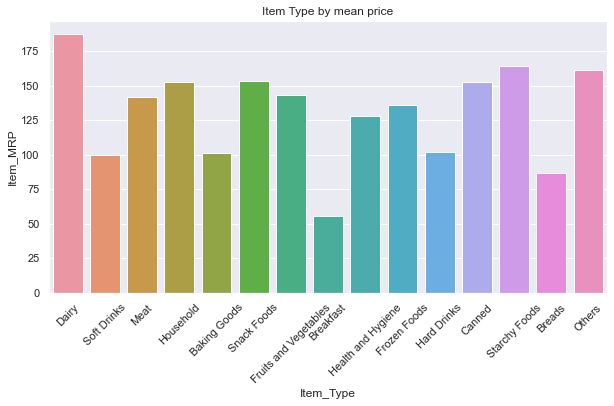

In [67]:
plt.figure(figsize=(10,5))
pbar = sns.barplot(x="Item_Type", y="Item_MRP", data=data_BM, ci=None);  # ci refers to confidence intervals
pbar.set_title('Item Type by mean price')
plt.xticks(rotation=45);
# plt.title('Item Type by mean price')


# Here on x-axis we have categories & y-axis mrp.
# If u think there will be no trend, go for bar chart.
# If u think a trend is possible b/w these 2 variables (Item_type & Price) then can also go for a line chart.

## Advantage of seaborn over matplotlib

- For same Bar chart above using Matplotlib we needed to use groupby clause to plot Outlet_size vs Outlet_sales_mean however with seaborn we did not need to do groupby even for plotting bivariate analysis. This will also be applicable while plotting boxplot for bivariate analysis.

- By default seaborn plots mean. However it is possible to change to other function by giving that function in the estimator argument.
- Cases for both mean and sum as shown in below bar charts, without estimator (default mean) and with estimator parameter.

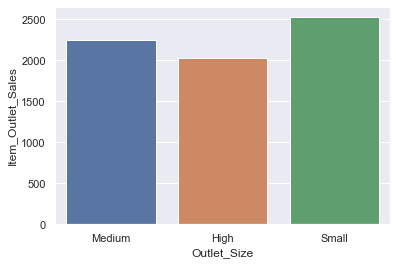

In [75]:
sns.barplot(x="Outlet_Size", y="Item_Outlet_Sales", data=data_BM, ci=None);

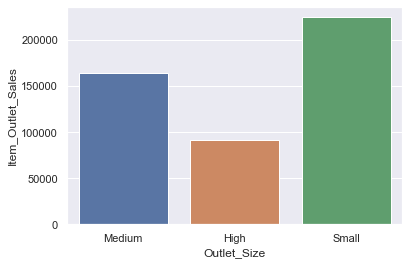

In [76]:
sns.barplot(x="Outlet_Size", y="Item_Outlet_Sales", data=data_BM,estimator = np.sum, ci=None);

## Histogram using Matplotlib

- plt.hist()
- range against its frequency
- For continous variable 

**Note**
(If on x-axis categorical variable then bar chart & not histogram)

- Also this is univariate analysis (as we r analysing only 1 variable i.e. analysing its distribution)
- The default value of the number of bins to be created in a histogram is 10. However, we can change the size of bins using the parameter bins in matplotlib.

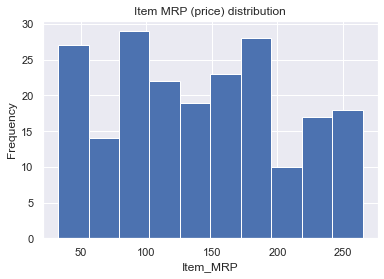

In [77]:
# title
plt.title('Item MRP (price) distribution')

# xlabel
plt.xlabel('Item_MRP')

# ylabel
plt.ylabel('Frequency')

# plot histogram
plt.hist(data_BM['Item_MRP']);

## Histogram using Seaborn

- using the distplot()
- range against its frequency
- For continous variable

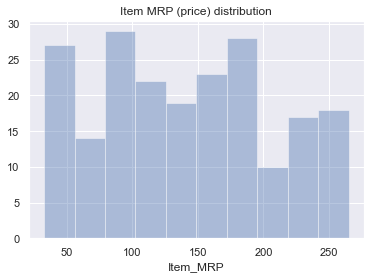

In [80]:
p = sns.distplot(data_BM['Item_MRP'], bins=10,kde=False)
p.set_title('Item MRP (price) distribution');

## Box Plot Using Matplotlib
- Boxplots are also used to see Distribution apart from histograms which are also used to see distributions.
- Out of 3 methods used below, 3rd one is direct & shortest.
- In all these boxplot is being used for Univariate analysis (i.e. only see distribution of a single variable).

   Item_Outlet_Sales
0          3735.1380
1           443.4228
2          2097.2700
4           994.7052
5           556.6088
<class 'pandas.core.frame.DataFrame'>
(207, 1) 

Int64Index([0, 1, 2, 4, 5, 6, 10, 11, 12, 13], dtype='int64') 

[[3735.138 ]
 [ 443.4228]
 [2097.27  ]
 [ 994.7052]
 [ 556.6088]
 [ 343.5528]
 [1516.0266]
 [2187.153 ]
 [1589.2646]
 [2145.2076]]


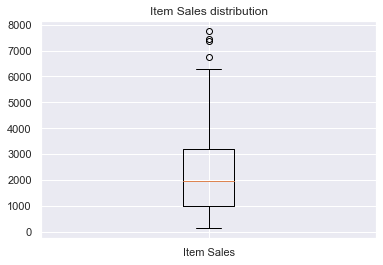

In [101]:
# Method 1  - Making df & then plotting

data = data_BM[['Item_Outlet_Sales']]  # double brackets, will give result in form of df 
print(data.head())                     # ideally [[]] used when multiple columns need to be selected
print(type(data))
print(data.shape,'\n')

print(data.index[0:10],'\n')
print(data.values[0:10])

# set title
plt.title('Item Sales distribution')

# make the boxplot
plt.boxplot(data1.values, labels=['Item Sales']);

0    3735.1380
1     443.4228
2    2097.2700
4     994.7052
5     556.6088
Name: Item_Outlet_Sales, dtype: float64
<class 'pandas.core.series.Series'>
(207,) 

Int64Index([0, 1, 2, 4, 5, 6, 10, 11, 12, 13], dtype='int64') 

[3735.138   443.4228 2097.27    994.7052  556.6088  343.5528 1516.0266
 2187.153  1589.2646 2145.2076]


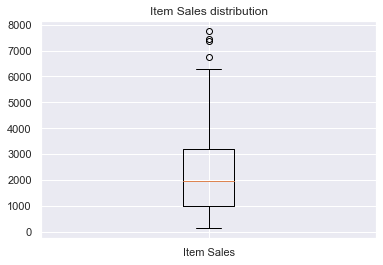

In [103]:
# Method 2 - Making series & then plotting
# There is no need of dataframe as above, series will also work so we create a series

data1 = data_BM['Item_Outlet_Sales']   # single bracket, 1 column extracted which is a series
print(data1.head())
print(type(data1))
print(data1.shape,'\n')

print(data1.index[0:10],'\n')
print(data1.values[0:10])

# set title
plt.title('Item Sales distribution')

# make the boxplot
plt.boxplot(data1.values, labels=['Item Sales']);

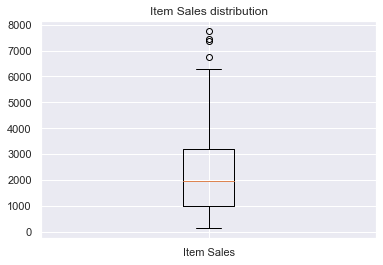

In [104]:
# Method 3 - Directly give column name in plt.boxplot for the column u want to plot. - Vertical Plot

plt.boxplot(data_BM['Item_Outlet_Sales'], labels=['Item Sales'])
plt.title('Item Sales distribution');


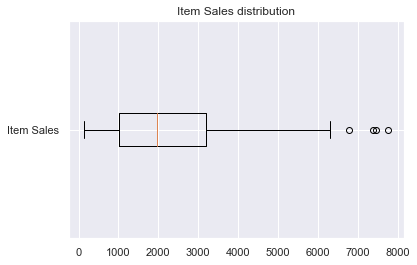

In [105]:
# Method 3 - Directly give column name in plt.boxplot for the column u want to plot. - Horizontal Plot

plt.boxplot(data_BM['Item_Outlet_Sales'], labels=['Item Sales'], vert=False)
plt.title('Item Sales distribution');


## Box Plot Using seaborn


/Users/sylvia/opt/anaconda3/envs/TF1/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


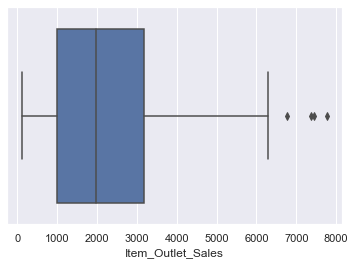

In [108]:
# Box plot using seaborn
sns.boxplot(data_BM['Item_Outlet_Sales'],orient="h");

**Note**

- Below boxplot is being used for Bivariate analysis (as we have 2 variables Outlet_size and item_Sales).
- The continuous varaible is on y-axis whose distribution we want to see.
- Categorical variable on x-axis, outlet_size, w.r.t which we want to see distribution of item sales.
- Again advantage over matplotlib as we do not need to use groupby to group outlets by Item_Sales.

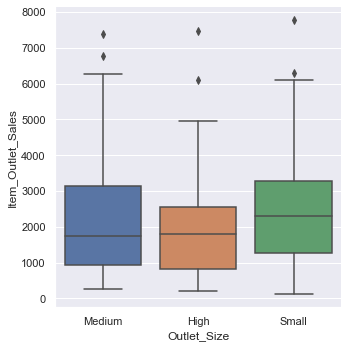

In [106]:
# Categorical distribution plots

sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="box",data=data_BM);

## Scatter Plot using Matplotlib

- Distribution of two variables to check  relationship between them.


#### Advantage of seaborn over Matplotlib

- With matplotlib u need to specifically label axis while in seaborn it takes from column names specified in x & y. 

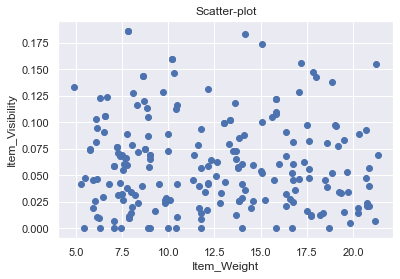

In [113]:
# set label of axes 
plt.xlabel('Item_Weight')
plt.ylabel('Item_Visibility')
plt.title('Scatter-plot')

# plot
#plt.scatter(data_BM["Item_Weight"][:200], data_BM["Item_Visibility"]);

plt.scatter(data_BM["Item_Weight"], data_BM["Item_Visibility"]);

## Scatter Plot using seaborn


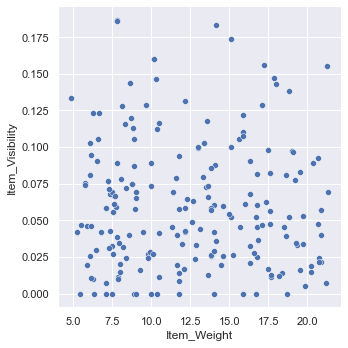

In [111]:
#### Scatter Plots- Seaborn
sns.relplot(x=data_BM["Item_Weight"], y=data_BM["Item_Visibility"], data=data_BM, kind="scatter");

# Hue semantic
- Add another dimension to the plot by coloring the points according to a third variable. 
- In seaborn, this is referred to as using a “hue semantic”.
- changing bivariate to multivariate analysis

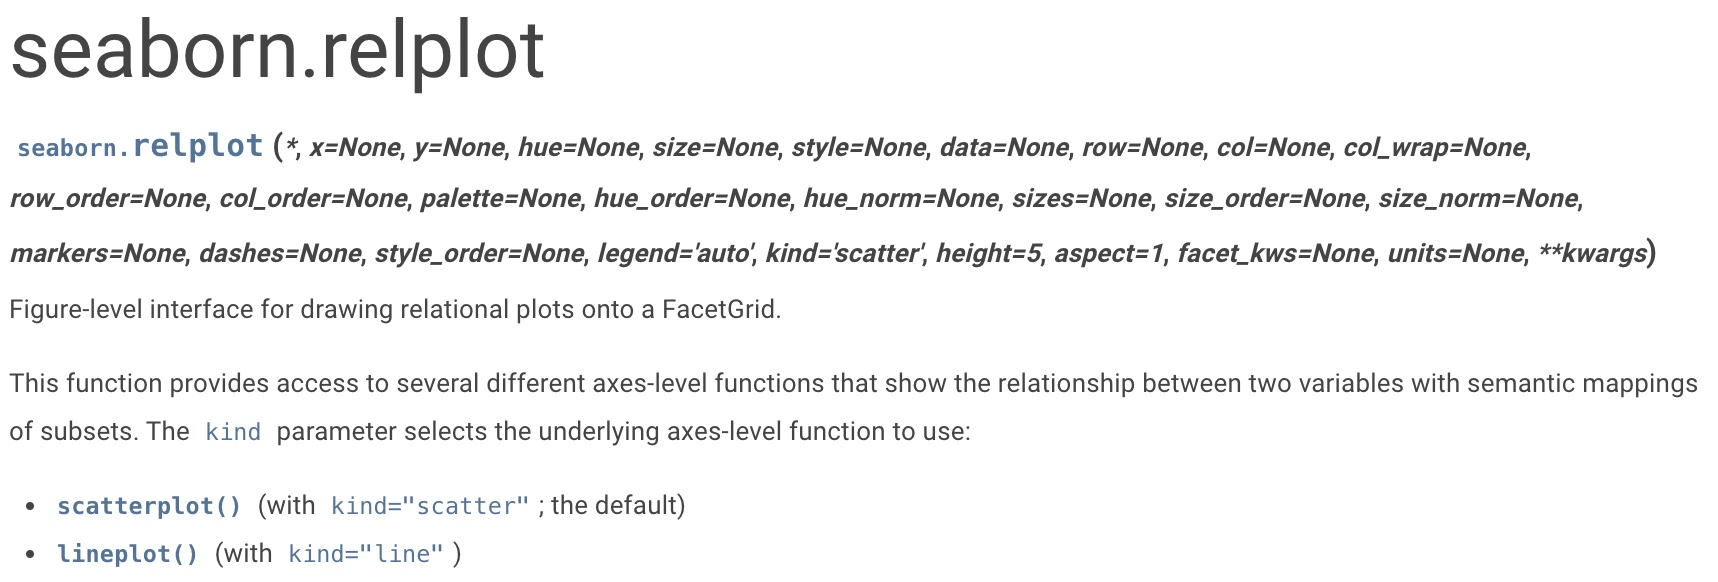

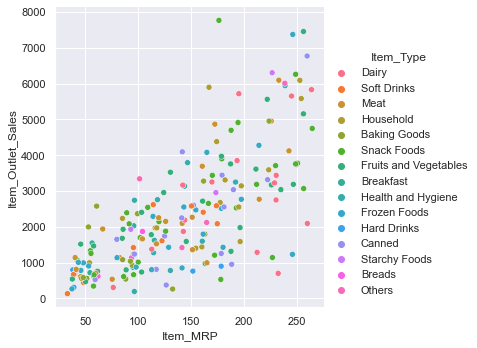

In [114]:
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", hue="Item_Type",data=data_BM);

## Pair plots using seaborn


- pairplot will plot only numerical variables

- pairplot to check relationship of target feature with rest of independent variables/features

- In some of below scatter plots where you see just a straight line of points (either horizontal or vertical) means there is no relationship it is just a constant value-no analysis required for such plots.

- In below plots histogram is like univariate because it corresponds to e.g. Item Weight vs Item Weight & hence makes sense to just view the distribution of form of histogram (like just 1 variable analysis).

- In scatter plot v r analysing 2 different variables w.r.t each other.


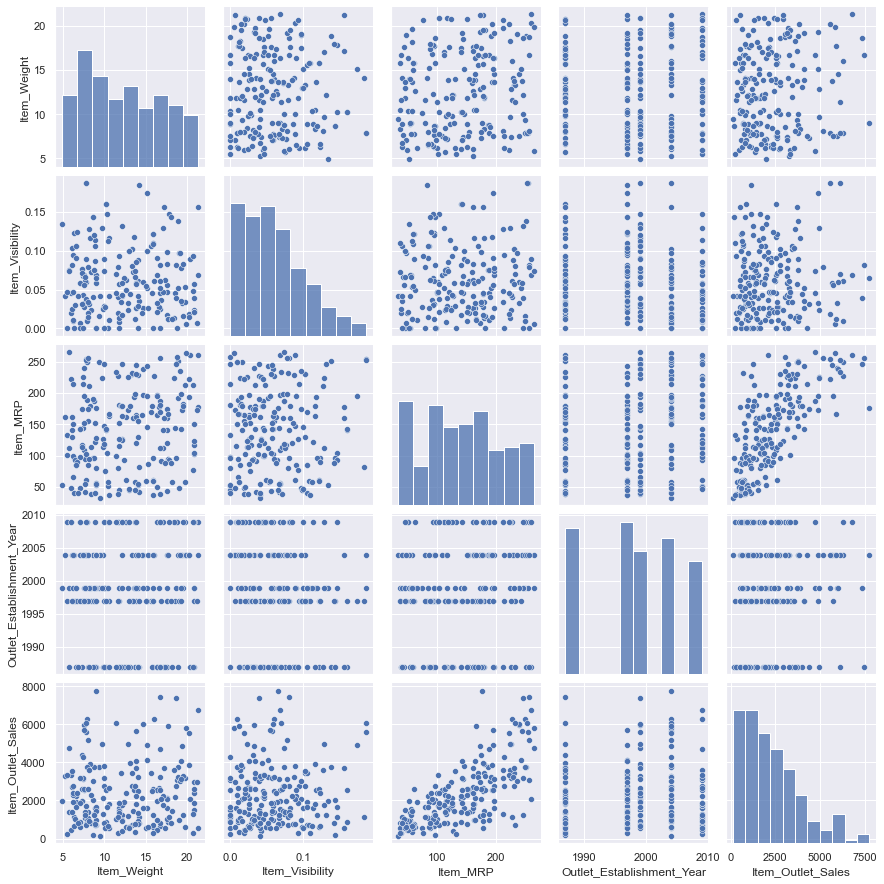

In [115]:
sns.pairplot(data=data_BM);

## Pair plot is Qualitative

With the help of hue u can add a 3rd variable (usually categorical) to see further insights on relationships mostly that variable will try to segregate into some kind of groups.

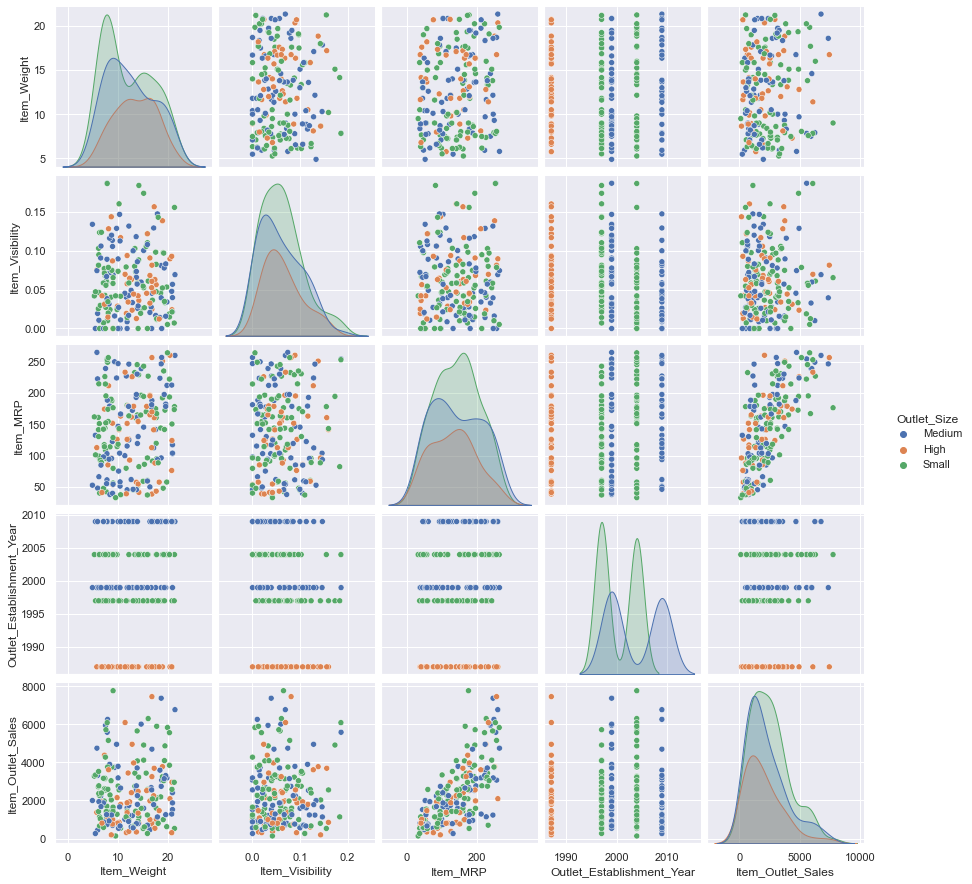

In [116]:
sns.pairplot(data=data_BM, hue='Outlet_Size', height=2.5);

## Correlation heatmap is Quantitative

- Since heatmaps are a graphic, it will become more crowded as the amount of variables increase.
- Heatmap is seaborn 2D graphical representation of data where individual values that r contained in a matrix r represented as colors. **It is 2D graphical representation but it is used for multivariate analysis (for many variables)** 
- The heatmap style correlation matrix is a very effective tool when used properly. The user will be able to identify highly correlated variables and this will allow them to streamline the feature selection process.

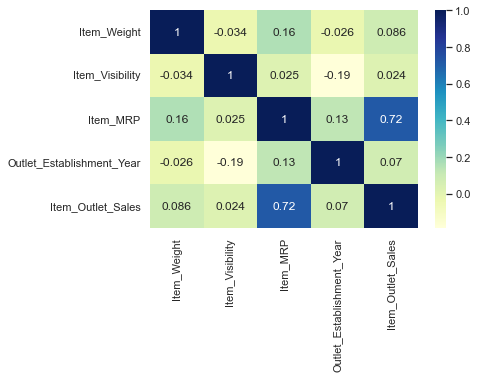

In [117]:
# Plotting correlation heatmap
sns.heatmap(data_BM.corr(),cmap="YlGnBu", annot=True, cbar=True);

**Note**

You need to look at data simultaneously (both qualitative like pairplot and quantitative like correlation plot and then make features based on insights from (pairplot with hue). If u make some new features based on insights you need to add those feature to correlation heatmap, to check strength of relationship quantitatively).

## Difference b/w Heatmap and Correlation heatmap

- A heatmap is a matrix representation of the variables, which is coloured based on the intensity of the value. These are raw values.  
- Correlation heatmap is one of most popular types of heatmap for displaying correlation among your variables. These plot the correlation values inside the matrix.


### Heatmaps

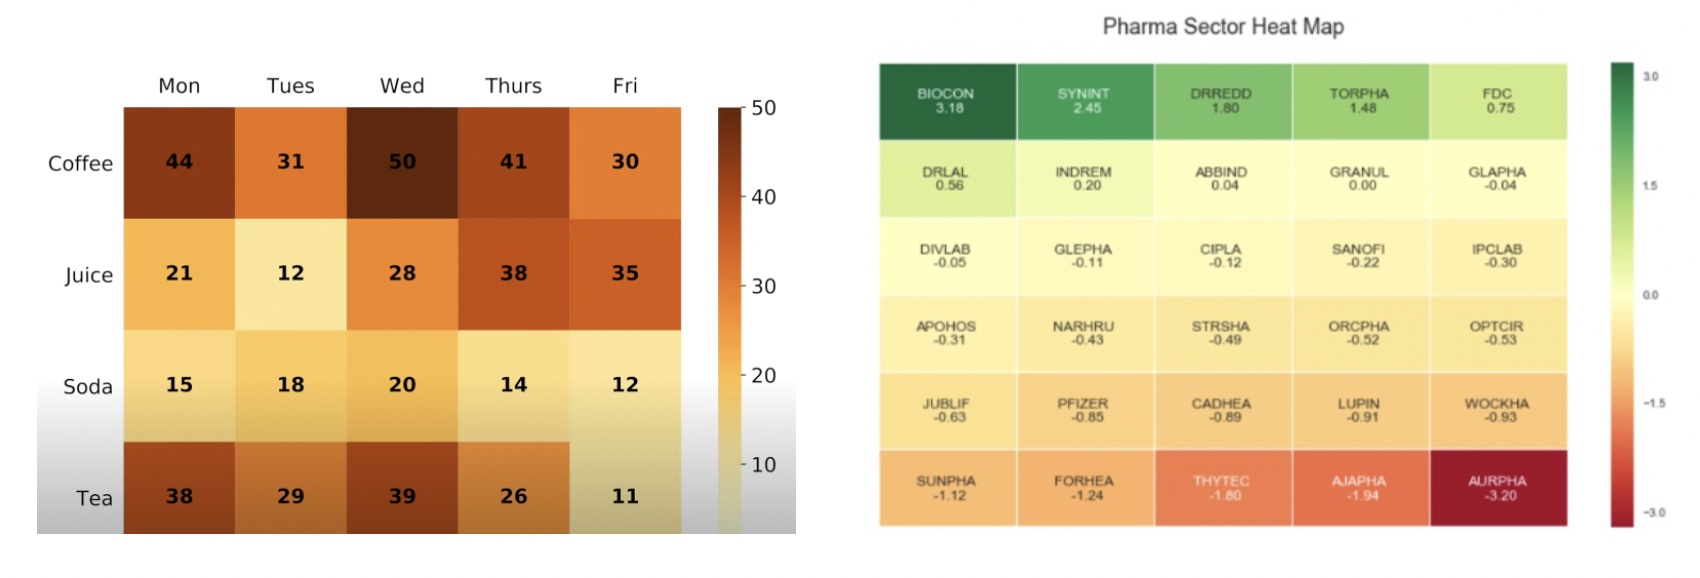

### Correlation Heatmaps

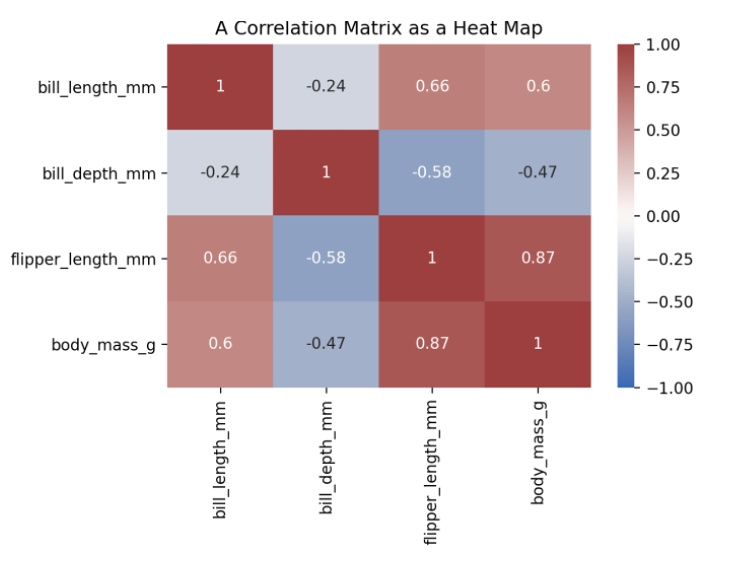

## Difference b/w Univariate, Bivariate and Multivariate analysis

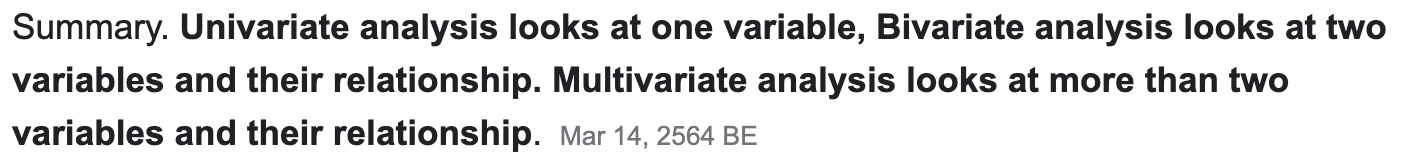

**Univariate analysis** <br>

is the simplest of the three analyses where the data you are analyzing is only one variable. The most common univariate analysis is checking the central tendency (mean, median and mode), the range, the maximum and minimum values, and standard deviation of a variable.


**Bivariate analysis**<br>

is where you are comparing two variables to study their relationships. These variables could be dependent or independent to each other. In Bivariate analysis there is always a Y-value for each X-value.


**Multivariate analysis**<br>

is similar to Bivariate analysis but you are comparing more than two variables. For three variables, you can create a 3-D model to study the relationship (also known as Trivariate Analysis). However, since we cannot visualize anything above the third dimension, we often rely on other softwares and techniques for us to be able to grasp the relationship in the data.



## Examples of Univariate, Bivariate and Multivariate plots

**Univariate Plots**
- histogram
- box plot or 
- violin plot <br>
These are usualy used to check central tendency, compare the spread of the variables and provides an insight into outliers.

**Bivariate Plots**
- Scatter plot
- Line Chart
- bar plot (both uni & bi)
- box plot (both uni & bi)
- These used to study the relationship of the variables. 

**Multivariate Plots**
- Pairplots where it generates one large chart of selected variables against one another in a series of scatter plots and histograms depending on the type of variable, also known as scatter plot matrix.
- Correlation heatmaps
- Stacked bar Chart
- Scatter plot with hue(as 3rd variable)

## Univariate Time Series - Have only 1 variable with time

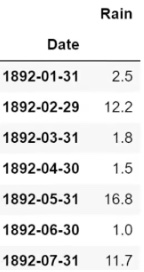

A time series can be univariate, bivariate, or multivariate. A univariate time series has only one variable, a bivariate has two variables, and a multivariate has more than two variables.